## Import Data

In [449]:
df = pd.read_csv("fraud_oracle.csv")

In [450]:
df = df.drop(columns=['PolicyNumber','RepNumber','Year'])
df = df.loc[df['DayOfWeekClaimed']!='0']

## One Hot Encoding before splitting

In [451]:
# ADDED STEP: One-Hot encode for columns that does not have ordinal relationship
df = pd.get_dummies(df, columns = ['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy'],drop_first=True)

## Seperate Target and Features

In [452]:
X = df.drop(columns = ['FraudFound_P'])
y = df ['FraudFound_P']

### Train Test split

In [454]:
from sklearn.model_selection import train_test_split

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Test Validation split

In [455]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [456]:
X_train.shape

(10330, 57)

In [457]:
X_train.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'Age', 'Fault',
       'VehiclePrice', 'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'Make_BMW', 'Make_Chevrolet', 'Make_Dodge', 'Make_Ferrari', 'Make_Ford',
       'Make_Honda', 'Make_Jaguar', 'Make_Lexus', 'Make_Mazda', 'Make_Mecedes',
       'Make_Mercury', 'Make_Nisson', 'Make_Pontiac', 'Make_Porche',
       'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widow',
       'PolicyType_Sedan - Collision', 'PolicyType_Sedan - Liability',
       'PolicyType_Sport - All Perils', 'PolicyType_Sport - Collision',
       'PolicyType_Sport - Liability', 'PolicyTy

## Preprocess

In [458]:
def encoding (data):
  #Ordinal Encode
  ordinal_encoder = OrdinalEncoder()
  data_ordinal = ['Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
                 'PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','NumberOfSuppliments',
                 'AddressChange_Claim','NumberOfCars']
  data[data_ordinal] = ordinal_encoder.fit_transform(data[data_ordinal])
  
  #Label Encode
  data_cat_label = data[['AccidentArea','Sex','Fault','PoliceReportFiled','WitnessPresent','AgentType']]
  label_encoder = preprocessing.LabelEncoder()
  for i in  data_cat_label:
    data[i] = label_encoder.fit_transform(data[i])

  min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
  data_num = ['WeekOfMonth','WeekOfMonthClaimed','Age','Deductible','DriverRating',
              'Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
                 'PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','NumberOfSuppliments',
                 'AddressChange_Claim','NumberOfCars']
  data[data_num] = min_max_scaler.fit_transform(data[data_num])

  return data                              

In [459]:
X_train = encoding(X_train)
X_val = encoding(X_val)
X_test = encoding(X_test)

In [460]:
X_train.shape

(10330, 57)

In [461]:
X_train

,Month,WeekOfMonth,DayOfWeek,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,...,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_Collision,BasePolicy_Liability
1215,-0.090909,0.0,-0.333333,1,-0.666667,-0.090909,0.0,1,-0.150,0,...,0,0,0,0,0,0,1,0,0,1
12079,0.454545,-0.5,1.000000,1,1.000000,0.090909,0.0,1,-0.125,1,...,0,0,0,0,0,0,0,0,1,0
14292,0.454545,-1.0,1.000000,1,1.000000,0.454545,-1.0,0,0.200,0,...,0,0,0,0,0,0,1,0,0,1
11332,0.636364,1.0,0.666667,1,-1.000000,-0.636364,0.0,1,0.350,0,...,0,0,0,0,0,0,0,0,1,0
13740,-0.272727,-0.5,-1.000000,1,1.000000,-0.272727,0.0,1,0.600,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,0.272727,-0.5,-0.333333,1,1.000000,0.272727,0.0,1,0.500,0,...,0,0,0,0,0,0,0,0,0,0
13419,1.000000,0.5,-0.666667,1,-0.666667,1.000000,0.5,1,-1.000,0,...,0,0,0,0,0,0,0,0,0,0
5391,-0.272727,0.0,0.333333,1,-1.000000,-0.272727,0.5,1,0.100,0,...,0,0,0,0,0,0,0,0,1,0
860,-1.000000,-1.0,1.000000,1,-1.000000,-1.000000,-0.5,1,0.175,0,...,0,0,0,0,0,0,1,0,0,1


# Modelling Part

## Import Library

In [ ]:
import warnings
import gc
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import diverging_palette

In [ ]:
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)

## Baseline Model

In [462]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

DummyClassifier()

Since we are dealing with default problem, the top 1 task is to measure the proportion of actual defaults that are correctly identified as defaults (Recall), followed by Precision.

### Recall of DummyClassifier

In [463]:
from sklearn import metrics
metrics.recall_score(y_val, dummy_clf.predict(X_val))

0.0

### Precision of DummyClassifier

In [464]:
metrics.precision_score(y_val, dummy_clf.predict(X_val))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

### Accuracy of the baseline Model

In [465]:
dummy_clf.score(X_val, y_val)

0.9430031446540881

## Evaluation Metrics

### ROC Curve

In [466]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### PR Curve

In [467]:
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

### Classification Score

In [468]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, plot_precision_recall_curve, roc_curve, roc_auc_score, plot_roc_curve, plot_confusion_matrix
from sklearn.model_selection import cross_val_score

def clf_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

### Classification Metrics

In [469]:
def evaluation_metrics(y_actual, y_pred):
            
        precision, recall, _ = precision_recall_curve(y_actual, y_pred)
        average_precision = average_precision_score(y_actual, y_pred)
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_actual, y_pred)
        roc_auc = roc_auc_score(y_actual, y_pred)
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_actual, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_actual, y_pred)))

## Dealing with Imbalanced Data

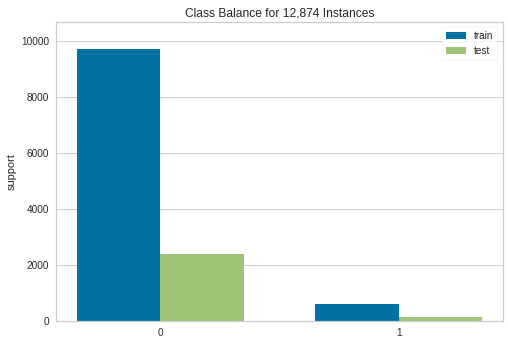

In [470]:
from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=["0", "1"])

visualizer.fit(y_train, y_val)        # Fit the data to the visualizer
visualizer.show()  

Clear imbalanced sign! Apply over-sampling (SMOTE and ADASYN) and SMOTEENN 

In [471]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### SMOTE

In [472]:
from imblearn.over_sampling import (SMOTE, ADASYN)

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [473]:
y_train.value_counts()

0    9716
1     614
Name: FraudFound_P, dtype: int64

In [474]:
y_train_sm.value_counts()

0    9716
1    9716
Name: FraudFound_P, dtype: int64

###  Adaptive Synthetic (ADASYN)

In [475]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [476]:
y_train_adasyn.value_counts()

1    9720
0    9716
Name: FraudFound_P, dtype: int64

### SMOTEENN

In [477]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_smoteen, y_train_smoteen = smote_enn.fit_resample(X_train, y_train)

In [478]:
y_train.value_counts()

0    9716
1     614
Name: FraudFound_P, dtype: int64

In [479]:
y_train_smoteen.value_counts()

1    9708
0    6674
Name: FraudFound_P, dtype: int64

## Modelling

### 1) Logistic Regression

In [434]:
from sklearn.linear_model import LogisticRegression

In [480]:
clf_log_reg_vanilla = LogisticRegression(C=0.0001, random_state=42, max_iter=500)
clf_log_reg_vanilla.fit(X_train_sm, y_train_sm)
y_val_pred = clf_log_reg_vanilla.predict(X_val)

In [481]:
# Calculate the accuracy score
accuracy=metrics.accuracy_score(y_val,y_val_pred)

# Calculate the Precision/Recall
recall=metrics.recall_score(y_val,y_val_pred)
precision=metrics.precision_score(y_val,y_val_pred)

# Calculate the F1 score
f1=metrics.f1_score(y_val,y_val_pred)

#Print the scores
print('Recall:',recall)
print('Precision:',precision)
print('Accuracy:',accuracy)
print('F1 score:',f1)


# Print the confusion matrix
metrics.confusion_matrix(y_val,y_val_pred)

# Print Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))


Recall: 0.8344827586206897
Precision: 0.11297852474323063
Accuracy: 0.6171383647798742
F1 score: 0.19901315789473684
        pred:0  pred:1
true:0    1449     950
true:1      24     121


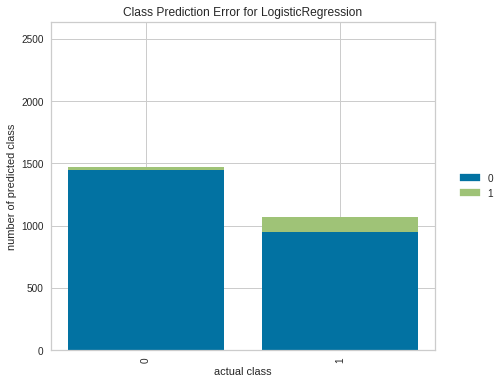

In [482]:
from yellowbrick.classifier import ClassPredictionError

classes = ["0", "1"]

visualizer = ClassPredictionError(
    clf_log_reg_vanilla, classes=classes, is_fitted=True
)

# Fit the training data to the visualizer
visualizer.fit(X_train_sm, y_train_sm)

# Evaluate the model on the test data
visualizer.score(X_val, y_val)

# Draw visualization
visualizer.show()

#### Classification Report

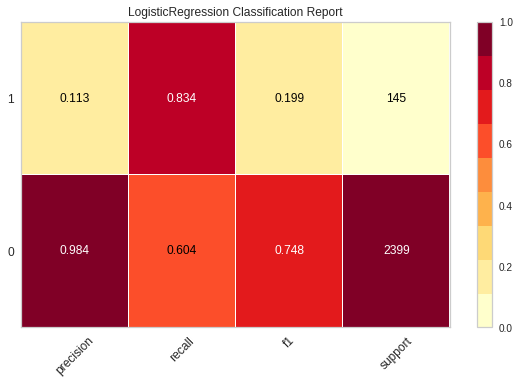

In [483]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(
    clf_log_reg_vanilla, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train_sm, y_train_sm)        # Fit the visualizer and the model
visualizer.score(X_val, y_val)        # Evaluate the model on the validation data
visualizer.show()      

#### Confusion Matrix

In [329]:
from yellowbrick.classifier import ConfusionMatrix

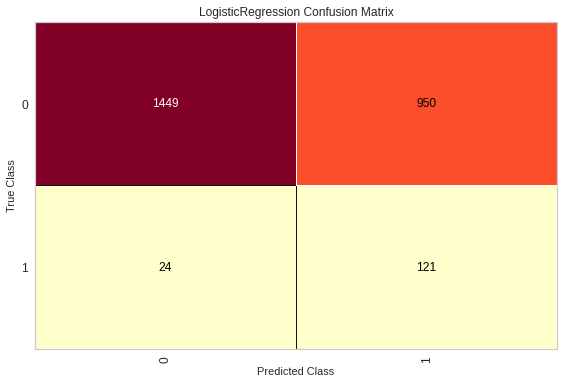

In [484]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(clf_log_reg_vanilla, classes=[0,1], is_fitted=True)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_sm, y_train_sm)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_val, y_val)

cm.show()

### 2) Random Forest

#### Using SMOTE

In [332]:
from sklearn.ensemble import RandomForestClassifier

In [485]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_sm, y_train_sm)
y_val_pred_rf = model_rf.predict(X_val)

In [486]:
# Calculate the accuracy score
accuracy1=metrics.accuracy_score(y_val,y_val_pred_rf)
precision1=metrics.precision_score(y_val,y_val_pred_rf)
recall1=metrics.recall_score(y_val,y_val_pred_rf)
f11=metrics.f1_score(y_val,y_val_pred_rf)

print('Recall:',recall1)
print('Precision:',precision1)
print('Accuracy:',accuracy1)
print('F1 score:',f11)

# Print the confusion matrix
metrics.confusion_matrix(y_val,y_val_pred_rf)
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_rf, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))


Recall: 0.04827586206896552
Precision: 0.3888888888888889
Accuracy: 0.9414308176100629
F1 score: 0.08588957055214724
        pred:0  pred:1
true:0    2388      11
true:1     138       7


#### Using ADASYN

In [487]:
model_rf2 = RandomForestClassifier(max_features=4, min_samples_leaf= 3,n_estimators=140)
model_rf2.fit(X_train_adasyn, y_train_adasyn)
y_val_pred_rf2 = model_rf2.predict(X_val)

In [488]:
# Calculate the accuracy score
accuracy2=metrics.accuracy_score(y_val,y_val_pred_rf2)
precision2=metrics.precision_score(y_val,y_val_pred_rf2)
recall2=metrics.recall_score(y_val,y_val_pred_rf2)
f12=metrics.f1_score(y_val,y_val_pred_rf2)

print('Recall:',recall2)
print('Precision:',precision2)
print('Accuracy:',accuracy2)
print('F1 score:',f12)

# Print the confusion matrix
metrics.confusion_matrix(y_val,y_val_pred_rf2)
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_rf2, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))


Recall: 0.14482758620689656
Precision: 0.21875
Accuracy: 0.9217767295597484
F1 score: 0.17427385892116182
        pred:0  pred:1
true:0    2324      75
true:1     124      21


#### Using SMOTEEN

In [489]:
model_rf3 = RandomForestClassifier(random_state=42)
model_rf3.fit(X_train_smoteen, y_train_smoteen)
y_val_pred_rf3 = model_rf3.predict(X_val)

In [490]:
# Calculate the accuracy score
accuracy3=metrics.accuracy_score(y_val,y_val_pred_rf3)
precision3=metrics.precision_score(y_val,y_val_pred_rf3)
recall3=metrics.recall_score(y_val,y_val_pred_rf3)
f13=metrics.f1_score(y_val,y_val_pred_rf3)

print('Recall:',recall3)
print('Precision:',precision3)
print('Accuracy:',accuracy3)
print('F1 score:',f13)

# Print the confusion matrix
metrics.confusion_matrix(y_val,y_val_pred_rf3)
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_val_pred_rf3, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))


Recall: 0.22758620689655173
Precision: 0.15207373271889402
Accuracy: 0.8836477987421384
F1 score: 0.18232044198895028
        pred:0  pred:1
true:0    2215     184
true:1     112      33


Compare the result of different models

In [491]:
print("SMOTE")
print('Recall:',recall1)
print('Precision:',precision1)
print('Accuracy:',accuracy1)
print('F1 score:',f11)

print("ADASYN")
print('Recall:',recall2)
print('Precision:',precision2)
print('Accuracy:',accuracy2)
print('F1 score:',f12)


print("SMOTEEN")
print('Recall:',recall3)
print('Precision:',precision3)
print('Accuracy:',accuracy3)
print('F1 score:',f13)

SMOTE
Recall: 0.04827586206896552
Precision: 0.3888888888888889
Accuracy: 0.9414308176100629
F1 score: 0.08588957055214724
ADASYN
Recall: 0.14482758620689656
Precision: 0.21875
Accuracy: 0.9217767295597484
F1 score: 0.17427385892116182
SMOTEEN
Recall: 0.22758620689655173
Precision: 0.15207373271889402
Accuracy: 0.8836477987421384
F1 score: 0.18232044198895028


Based on the above result, SMOTEEN will be used.

#### Model Tunning

In [504]:
from sklearn.model_selection import GridSearchCV

In [516]:
model_rf = RandomForestClassifier()
params = {'n_estimators':[100,120,140,160,180,200],
          'min_samples_leaf':[3],
          'max_features': range(1,6)
         }
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=params, scoring='f1',cv=5)
grid_search_rf.fit(X_train_smoteen, y_train_smoteen)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 6), 'min_samples_leaf': [3],
                         'n_estimators': [100, 120, 140, 160, 180, 200]},
             scoring='f1')

In [517]:
grid_search_rf.best_score_

0.967765292508789

In [518]:
grid_search_rf.best_params_

{'max_features': 5, 'min_samples_leaf': 3, 'n_estimators': 160}

In [520]:
model_rf_final = RandomForestClassifier(max_features=5,min_samples_leaf=3,n_estimators=160)
model_rf_final.fit(X_train_smoteen, y_train_smoteen)
y_pred_rf_final = model_rf_final.predict(X_val)

In [521]:
accuracy_final=metrics.accuracy_score(y_val,y_pred_rf_final)
precision_final=metrics.precision_score(y_val,y_pred_rf_final)
recall_final=metrics.recall_score(y_val,y_pred_rf_final)
f1_final=metrics.f1_score(y_val,y_pred_rf_final)

print('Recall:',recall_final)
print('Precision:',precision_final)
print('Accuracy:',accuracy_final)
print('F1 score:',f1_final)

# Print the confusion matrix
metrics.confusion_matrix(y_val,y_pred_rf_final)
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_rf_final, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))


Recall: 0.36551724137931035
Precision: 0.15229885057471265
Accuracy: 0.847877358490566
F1 score: 0.2150101419878296
        pred:0  pred:1
true:0    2104     295
true:1      92      53


#### Visualize the result

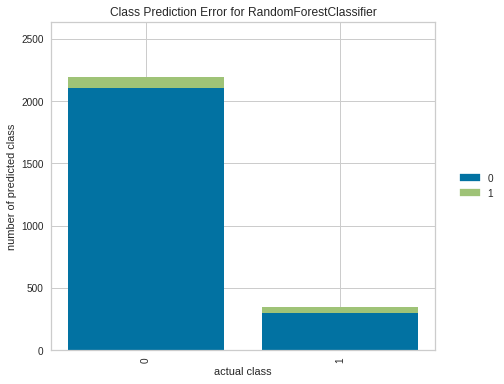

In [522]:
classes = ["0", "1"]

visualizer = ClassPredictionError(
    model_rf_final, classes=classes, is_fitted=True
)

# Fit the training data to the visualizer
visualizer.fit(X_train_smoteen, y_train_smoteen)

# Evaluate the model on the test data
visualizer.score(X_val, y_val)

# Draw visualization
visualizer.show()

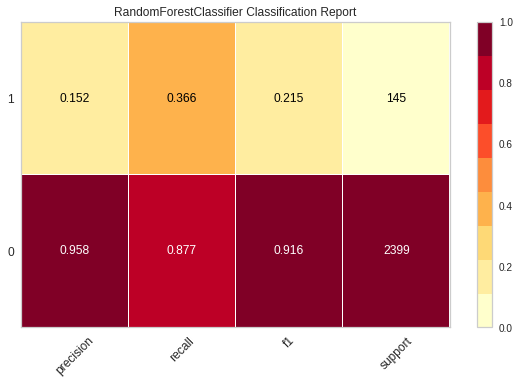

In [523]:
visualizer = ClassificationReport(
    model_rf_final, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train_smoteen, X_train_smoteen)        # Fit the visualizer and the model
visualizer.score(X_val, y_val)        # Evaluate the model on the validation data
visualizer.show()    

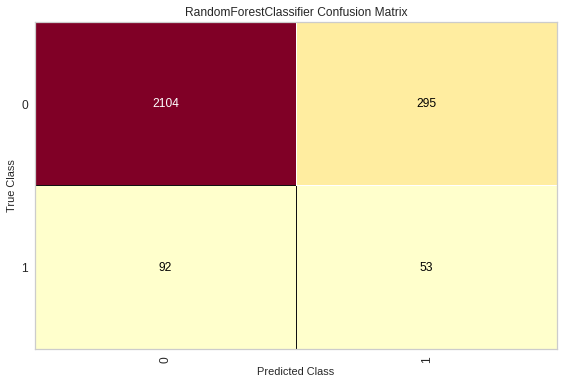

In [524]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_rf_final, classes=[0,1], is_fitted=True)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_smoteen, X_train_smoteen)

cm.score(X_val, y_val)

cm.show()

### 3) XGBoosting

In [ ]:
!pip install xgboost 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [495]:
import xgboost as xgb

#### Using SMOTE

In [496]:
clf_xgb = xgb.XGBClassifier()
clf_xgb.fit(X_train_sm, y_train_sm)
y_pred_xbg = clf_xgb.predict(X_val)

In [497]:
# Calculate the metrics
accuracy1=metrics.accuracy_score(y_val,y_pred_xbg)
precision1=metrics.precision_score(y_val,y_pred_xbg)
recall1=metrics.recall_score(y_val,y_pred_xbg)
f11=metrics.f1_score(y_val,y_pred_xbg)

print('Recall:',recall1)
print('Precision:',precision1)
print('Accuracy:',accuracy1)
print('F1 score:',f11)

# Print the confusion matrix
metrics.confusion_matrix(y_val,y_pred_xbg)
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_xbg, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

Recall: 0.08275862068965517
Precision: 0.2553191489361702
Accuracy: 0.9339622641509434
F1 score: 0.125
        pred:0  pred:1
true:0    2364      35
true:1     133      12


#### Using ADASYN

In [498]:
clf_xgb2 = xgb.XGBClassifier()
clf_xgb2.fit(X_train_adasyn, y_train_adasyn)
y_pred_xbg2 = clf_xgb2.predict(X_val)

In [499]:
accuracy2=metrics.accuracy_score(y_val,y_pred_xbg2)
precision2=metrics.precision_score(y_val,y_pred_xbg2)
recall2=metrics.recall_score(y_val,y_pred_xbg2)
f12=metrics.f1_score(y_val,y_pred_xbg2)

print('Recall:',recall2)
print('Precision:',precision2)
print('Accuracy:',accuracy2)
print('F1 score:',f12)

# Print the confusion matrix
metrics.confusion_matrix(y_val,y_pred_xbg2)
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_xbg2, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

Recall: 0.09655172413793103
Precision: 0.2978723404255319
Accuracy: 0.9355345911949685
F1 score: 0.14583333333333334
        pred:0  pred:1
true:0    2366      33
true:1     131      14


#### Using SMOTEEN

In [500]:
clf_xgb3 = xgb.XGBClassifier()
clf_xgb3.fit(X_train_smoteen, y_train_smoteen)
y_pred_xbg3 = clf_xgb3.predict(X_val)

In [501]:
# Calculate the metrics
accuracy3=metrics.accuracy_score(y_val,y_pred_xbg3)
precision3=metrics.precision_score(y_val,y_pred_xbg3)
recall3=metrics.recall_score(y_val,y_pred_xbg3)
f13=metrics.f1_score(y_val,y_pred_xbg3)

print('Recall:',recall3)
print('Precision:',precision3)
print('Accuracy:',accuracy3)
print('F1 score:',f13)

# Print the confusion matrix
metrics.confusion_matrix(y_val,y_pred_xbg3)
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_xbg3, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

Recall: 0.4206896551724138
Precision: 0.13616071428571427
Accuracy: 0.8148584905660378
F1 score: 0.2057335581787521
        pred:0  pred:1
true:0    2012     387
true:1      84      61


In [502]:
print("SMOTE")
print('Recall:',recall1)
print('Precision:',precision1)
print('Accuracy:',accuracy1)
print('F1 score:',f11)

print("ADASYN")
print('Recall:',recall2)
print('Precision:',precision2)
print('Accuracy:',accuracy2)
print('F1 score:',f12)


print("SMOTEEN")
print('Recall:',recall3)
print('Precision:',precision3)
print('Accuracy:',accuracy3)
print('F1 score:',f13)

SMOTE
Recall: 0.08275862068965517
Precision: 0.2553191489361702
Accuracy: 0.9339622641509434
F1 score: 0.125
ADASYN
Recall: 0.09655172413793103
Precision: 0.2978723404255319
Accuracy: 0.9355345911949685
F1 score: 0.14583333333333334
SMOTEEN
Recall: 0.4206896551724138
Precision: 0.13616071428571427
Accuracy: 0.8148584905660378
F1 score: 0.2057335581787521


SMOTEEN will be used.

#### Model Tunning

In [506]:
model_xgb = xgb.XGBClassifier()
params = {'n_estimators':[100,120,140,160,180,200],
          'min_samples_leaf':[3],
          'max_features': range(1,6)
         }
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=params, scoring='f1',cv=5)
grid_search_xgb.fit(X_train_smoteen, y_train_smoteen)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'max_features': range(1, 6), 'min_samples_leaf': [3],
                         'n_estimators': [100, 120, 140, 160, 180, 200]},
             scoring='f1')

In [507]:
grid_search_xgb.best_score_

0.9540695536710452

In [509]:
grid_search_xgb.best_params_

{'max_features': 1, 'min_samples_leaf': 3, 'n_estimators': 200}

In [511]:
model_xgb = xgb.XGBClassifier(max_features=1,min_samples_leaf=3,n_estimators=200)
model_xgb.fit(X_train_smoteen, y_train_smoteen)
y_pred_xbg_final = model_xgb.predict(X_val)

In [512]:
# Calculate the metrics
accuracy_final=metrics.accuracy_score(y_val,y_pred_xbg_final)
precision_final=metrics.precision_score(y_val,y_pred_xbg_final)
recall_final=metrics.recall_score(y_val,y_pred_xbg_final)
f1_final=metrics.f1_score(y_val,y_pred_xbg_final)

print('Recall:',recall_final)
print('Precision:',precision_final)
print('Accuracy:',accuracy_final)
print('F1 score:',f1_final)

# Print the confusion matrix
metrics.confusion_matrix(y_val,y_pred_xbg_final)
print(pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_xbg_final, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

Recall: 0.3931034482758621
Precision: 0.15447154471544716
Accuracy: 0.8427672955974843
F1 score: 0.22178988326848253
        pred:0  pred:1
true:0    2087     312
true:1      88      57


#### Visualize the result

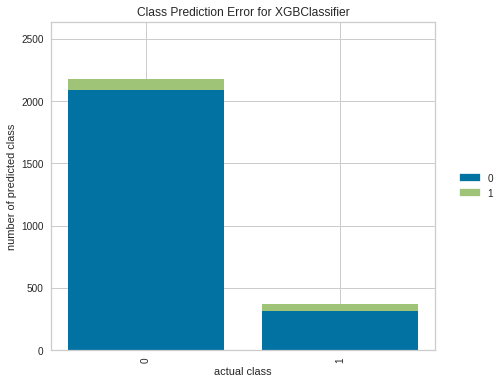

In [514]:
classes = ["0", "1"]

visualizer = ClassPredictionError(
    model_xgb, classes=classes, is_fitted=True
)

# Fit the training data to the visualizer
visualizer.fit(X_train_smoteen, y_train_smoteen)

# Evaluate the model on the test data
visualizer.score(X_val, y_val)

# Draw visualization
visualizer.show()

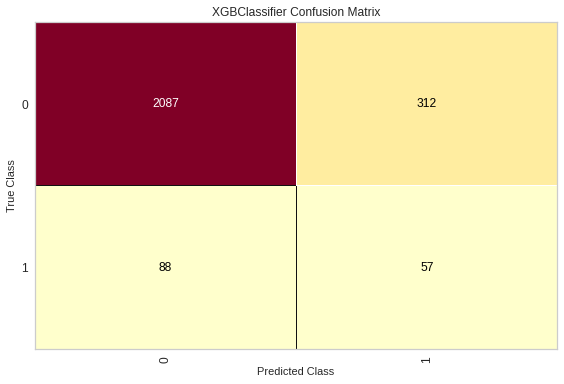

In [515]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model_xgb, classes=[0,1], is_fitted=True)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_smoteen, X_train_smoteen)

cm.score(X_val, y_val)

cm.show()

### AdaBoost